In [1]:
import requests
import json
import time
import itertools
import wget
import os
import pickle
import numpy as np

import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.cluster.bicluster import SpectralCoclustering
from sklearn.metrics import precision_recall_curve
import scipy

sns.set_style('white')
import tensorflow as tf
import pandas as pd
import keras
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras.initializers as init
from keras import backend as K
from keras.models import load_model

Using TensorFlow backend.


In [2]:
x_train_dict = pickle.load(open('training_num.pik' , 'rb'))

In [3]:
x_train_raw = x_train_dict['images'][:9988]

x_train = np.array(x_train_raw)

print x_train.shape

(9988, 128, 85, 3)


In [4]:
img_rows = x_train.shape[1]

img_cols = x_train.shape[2]

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
    
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)


In [5]:
x_train = x_train.astype('float32')

x_train /= 255

print 'x_train shape:', x_train.shape
print  x_train.shape[0], 'train samples'

x_train shape: (9988, 128, 85, 3)
9988 train samples


In [6]:
y_raw = pd.read_csv('Genres_labels_All_cleaned.csv')

y_train = y_raw.iloc[:, 1:-1].values

num_classes = y_train.shape[1]

In [12]:
# create an empty network model
model1 = Sequential()

# --- input layer ---
model1.add(Conv2D(16, kernel_size=(7, 7), activation='relu', input_shape=input_shape , 
                 kernel_initializer = init.he_normal(109)))

# --- max pool ---
model1.add(MaxPooling2D(pool_size=(2, 2)))


# ---- Conv Layer ---
model1.add(Conv2D(16, kernel_size=(5, 5), activation='relu', 
                 kernel_initializer = init.he_normal(109)))

# --- max pool ---
model1.add(MaxPooling2D(pool_size=(2, 2)))

# --- Conv layer ---
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
                kernel_initializer = init.he_normal(109)))

# --- max pool ---
model1.add(MaxPooling2D(pool_size=(2, 2)))

# --- Conv layer ---
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu' ,
                kernel_initializer = init.he_normal(109)))

# --- max pool ---
model1.add(MaxPooling2D(pool_size=(2, 2)))


# flatten for fully connected classification layer
model1.add(Flatten())

# --- fully connected layer ---
model1.add(Dense(128, activation='relu',
               kernel_initializer = init.he_normal(109)))

# --- fully connected layer ---
model1.add(Dense(64, activation='relu' ,
               kernel_initializer = init.he_normal(109)))

# --- classification ---
model1.add(Dense(num_classes, activation='sigmoid'))

# prints out a summary of the model architecture
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 122, 79, 16)       2368      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 61, 39, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 57, 35, 16)        6416      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 28, 17, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 26, 15, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 7, 32)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 5, 32)         9248      
__________

In [13]:
sgd = SGD(lr=1e-6, momentum=0.99)
model1.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [14]:
# Batch Size
batch_size = 64

# epochs
epochs = 50

In [ ]:
history = model1.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)


Train on 7990 samples, validate on 1998 samples
Epoch 1/50
7990/7990 [==============================] - 6s - loss: 0.6130 - acc: 0.6427 - val_loss: 0.6034 - val_acc: 0.6626

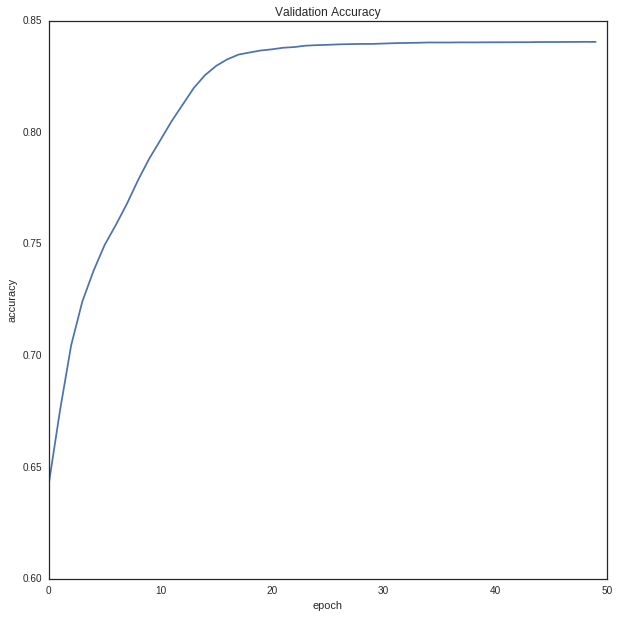

In [18]:
fig = plt.figure (figsize = (10,10))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(history.history['acc'])
ax1.set_xlabel("epoch")
ax1.set_title('Validation Accuracy')
ax1.set_ylabel("accuracy")
plt.show()

In [19]:
import h5py as h5py


In [21]:
model1.save('cnn_2.h5')

In [23]:
accurracy = pd.DataFrame(history.history['acc'] , columns = ['Accuracy'])
accurracy.to_csv('Accuracy_ver1.csv')